In [ ]:

!pip install -q flwr[simulation] flwr_datasets[vision]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/19

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.0MB/s]


In [ ]:
!unzip /content/pima-indians-diabetes-database.zip

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/diabetes.csv',header=None)
# df = pd.read_csv('/content/kddcup.data',header=None)
df.fillna(0, inplace=True)
df.columns = df.iloc[0]
df = df.iloc[1:,:]
df = df.astype(np.float64)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
764,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
765,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
766,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
767,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


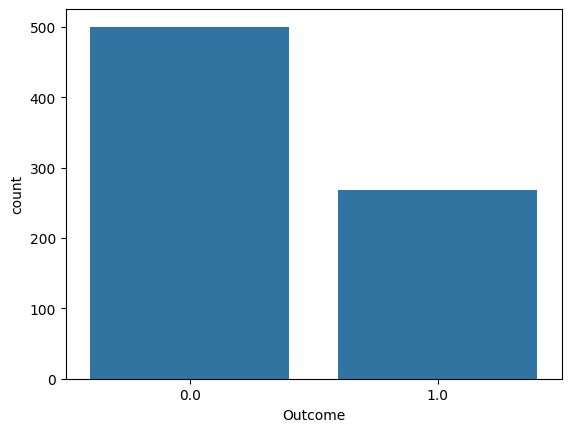

In [ ]:
# prompt: barplot the target

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df.columns[-1], data=df)
plt.show()


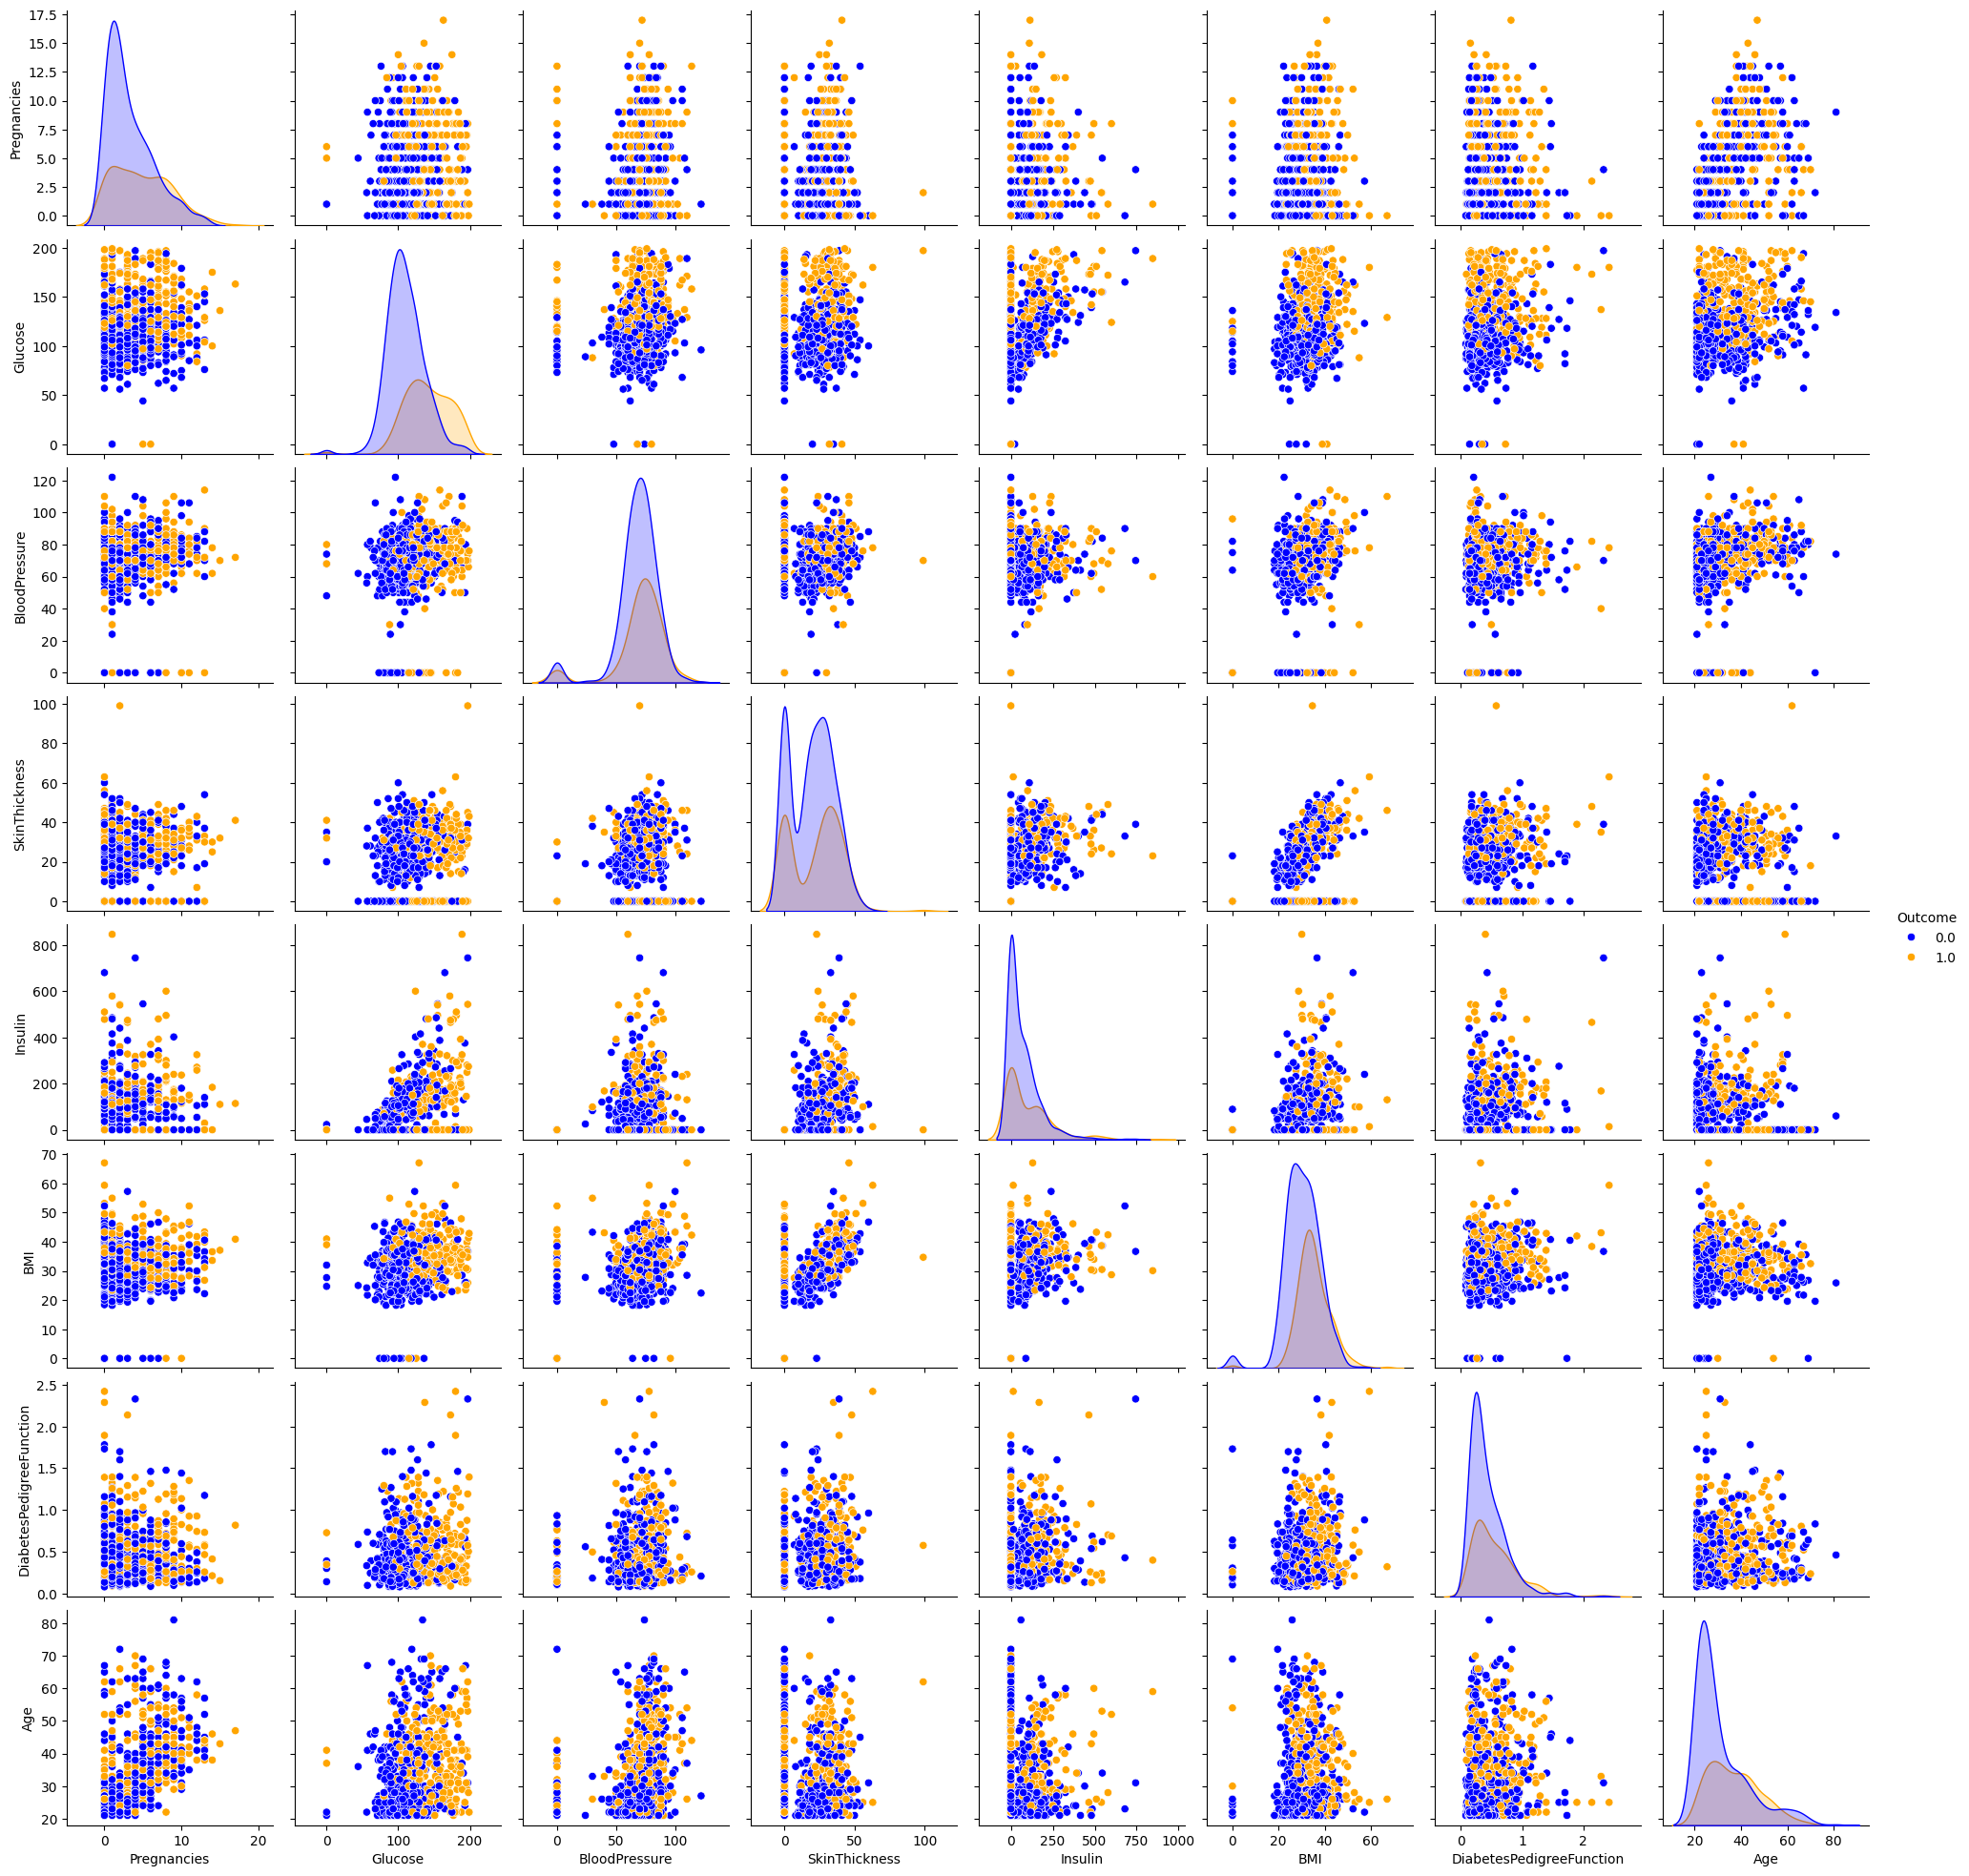

In [ ]:
# prompt: plot pair plot

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Outcome', palette=['blue', 'orange'])
plt.show()


In [ ]:
df.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,,,,,,,,,
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# prompt: drop all columns that have less than 0.2 correlation with the Outcome

cor = df.corr()
cor_target = abs(cor["Outcome"])
relevant_features = cor_target[cor_target>0.2]
df = df[relevant_features.index]
df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pregnancies,Glucose,BMI,Age,Outcome
1,6,148,33.6,50,1
2,1,85,26.6,31,0
3,8,183,23.3,32,1
4,1,89,28.1,21,0
5,0,137,43.1,33,1
...,...,...,...,...,...
764,10,101,32.9,63,0
765,2,122,36.8,27,0
766,5,121,26.2,30,0
767,1,126,30.1,47,1


In [ ]:
from collections import OrderedDict
from typing import List, Tuple


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from datasets.utils.logging import disable_progress_bar
from torch.utils.data import DataLoader

import flwr as fl
from flwr.common import Metrics
from flwr_datasets import FederatedDataset
import pandas as pd
import numpy as np

DEVICE = torch.device("cpu")
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
print(
    f"Training on {DEVICE} using PyTorch {torch.__version__} and Flower {fl.__version__}"
)
disable_progress_bar()

classes = df[df.columns[-1]].unique()

Training on cpu using PyTorch 2.3.1+cu121 and Flower 1.10.0


In [ ]:
#@title Normalize
df = df.astype(np.float16)
df.values[np.isnan(df.values)] = 0
df.iloc[:, 0:-1] = (df.iloc[:, 0:-1] - df.iloc[:, 0:-1].min()) / (df.iloc[:, 0:-1].max() - df.iloc[:, 0:-1].min())
df.values[np.isnan(df.values)] = 0
df


,Pregnancies,Glucose,BMI,Age,Outcome
1,0.353027,0.743652,0.500488,0.483398,1.0
2,0.058838,0.427246,0.396240,0.166626,0.0
3,0.470703,0.919434,0.347168,0.183350,1.0
4,0.058838,0.447266,0.418457,0.000000,0.0
5,0.000000,0.688477,0.642090,0.199951,1.0
...,...,...,...,...,...
764,0.588379,0.507324,0.490234,0.700195,0.0
765,0.117676,0.613281,0.548340,0.099976,0.0
766,0.294189,0.607910,0.390381,0.150024,0.0
767,0.058838,0.633301,0.448242,0.433350,1.0


In [ ]:
df[np.isnan(df.values)] = 0
np.any(np.isnan(df))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 90)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flat, y_train)

# Reshape images back to 3D after oversampling
X_train = X_train_resampled.reshape(-1, 8, 1)
y_train = y_train_resampled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#@title Normal Partitioner
from flwr_datasets.partitioner import DirichletPartitioner,IidPartitioner
from datasets import Dataset, DatasetDict,concatenate_datasets

NUM_CLIENTS = 3
BATCH_SIZE = 64

def load_datasets():
    # fds = FederatedDataset(dataset="cifar10", partitioners={"train": NUM_CLIENTS})

    data = {"features": X_train, "labels": y_train}
    dataset_train = Dataset.from_dict(data)

    # partitioner = DirichletPartitioner(num_partitions=NUM_CLIENTS, partition_by="labels",
    #                                    alpha=0.6, min_partition_size=3,
    #                                   self_balancing=True)
    partitioner =  IidPartitioner(num_partitions=NUM_CLIENTS)
    partitioner.dataset = dataset_train

    data = {"features": X_test, "labels": y_test}
    dataset_test = Dataset.from_dict(data)

    def apply_transforms(batch):
        # Instead of passing transforms to CIFAR10(..., transform=transform)
        # we will use this function to dataset.with_transform(apply_transforms)
        # The transforms object is exactly the same

        transform = transforms.Compose(
            [
                # transforms.ToTensor(),
                # transforms.Resize(
                #     size=(70, 70)
                # ),

                # transforms.Normalize((0.5), (0.5)),
            ]
        )
        batch["features"] = [transform(np.array(img,dtype=np.float32)) for img in batch["features"]]
        return batch

    # Create train/val for each partition and wrap it into DataLoader
    trainloaders = []
    valloaders = []
    for partition_id in range(NUM_CLIENTS):
        # partition = partitioner.load_partition(partition_id, "train")
        partition = partitioner.load_partition(partition_id)
        partition = partition.with_transform(apply_transforms)
        partition = partition.train_test_split(train_size=0.8, seed=42)
        trainloaders.append(DataLoader(partition["train"], batch_size=BATCH_SIZE))
        valloaders.append(DataLoader(partition["test"], batch_size=BATCH_SIZE))

        # trainloaders.append(DataLoader(partition, batch_size=BATCH_SIZE))

    # testset = partitioner.load_split("test").with_transform(apply_transforms)
    # testloader = DataLoader(testset, batch_size=BATCH_SIZE)
    dataset_test = dataset_test.with_transform(apply_transforms)
    testloader = DataLoader(dataset_test, batch_size=BATCH_SIZE)
    return trainloaders, valloaders, testloader


trainloaders, valloaders, testloader = load_datasets()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ArrowInvalid: Column 1 named labels expected length 397 but got length 794

In [ ]:
#@title Dirichlet Partitioner
from flwr_datasets.partitioner import DirichletPartitioner
from datasets import Dataset, DatasetDict,concatenate_datasets

NUM_CLIENTS = 3
BATCH_SIZE = 32

def load_datasets():
    # fds = FederatedDataset(dataset="cifar10", partitioners={"train": NUM_CLIENTS})

    data = {"features": X_train, "labels": y_train}
    dataset_train = Dataset.from_dict(data)

    partitioner = DirichletPartitioner(num_partitions=NUM_CLIENTS, partition_by="labels",
                                       alpha=0.6, min_partition_size=3,
                                      self_balancing=True)
    partitioner.dataset = dataset_train

    data = {"features": X_test, "labels": y_test}
    dataset_test = Dataset.from_dict(data)

    def apply_transforms(batch):
        # Instead of passing transforms to CIFAR10(..., transform=transform)
        # we will use this function to dataset.with_transform(apply_transforms)
        # The transforms object is exactly the same

        transform = transforms.Compose(
            [
                # transforms.ToTensor(),
                # transforms.Resize(
                #     size=(70, 70)
                # ),

                # transforms.Normalize((0.5), (0.5)),
            ]
        )
        batch["features"] = [transform(np.array(img,dtype=np.float32)) for img in batch["features"]]
        return batch

    # Create train/val for each partition and wrap it into DataLoader
    trainloaders = []
    valloaders = []
    for partition_id in range(NUM_CLIENTS):
        # partition = partitioner.load_partition(partition_id, "train")
        partition = partitioner.load_partition(partition_id)
        partition = partition.with_transform(apply_transforms)
        partition = partition.train_test_split(train_size=0.8, seed=42)
        trainloaders.append(DataLoader(partition["train"], batch_size=BATCH_SIZE))
        valloaders.append(DataLoader(partition["test"], batch_size=BATCH_SIZE))

        # trainloaders.append(DataLoader(partition, batch_size=BATCH_SIZE))

    # testset = partitioner.load_split("test").with_transform(apply_transforms)
    # testloader = DataLoader(testset, batch_size=BATCH_SIZE)
    dataset_test = dataset_test.with_transform(apply_transforms)
    testloader = DataLoader(dataset_test, batch_size=BATCH_SIZE)
    return trainloaders, valloaders, testloader


trainloaders, valloaders, testloader = load_datasets()

ArrowInvalid: Column 1 named labels expected length 397 but got length 794

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes=11) -> None:
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, 2)
        self.pool = nn.MaxPool1d(2, stride=1)
        # self.dropout = nn.Dropout(p=0.2)

        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.permute(0,2,1)
        # x = self.pool(F.relu(self.conv1(x)))

        # x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x.squeeze()

In [ ]:
def train(net, trainloader, epochs: int, verbose=True):
    """Train the network on the training set."""
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
    # optimizer = torch.optim.SGD(net.parameters(),lr=0.001)
    net.train()
    for epoch in range(epochs):
        correct, total, epoch_loss = 0, 0, 0.0
        for batch in trainloader:
            images, labels = batch["features"].to(DEVICE), batch["labels"].to(DEVICE)
            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss
            total += labels.size(0)
            correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
        epoch_loss /= len(trainloader.dataset)
        epoch_acc = correct / total
        if verbose:
            loss, accuracy = test(net, testloader)
            print(f"Epoch : {epoch+1} | Train loss : {epoch_loss:.4f} | Train Acc : {epoch_acc:.4f} | Test loss : {loss:.4f} | Test Acc : {accuracy:.4f}")
            # print(f"Epoch {epoch+1}: train loss {epoch_loss}, accuracy {epoch_acc}")


def test(net, testloader):
    """Evaluate the network on the entire test set."""
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    net.eval()
    with torch.no_grad():
        for batch in testloader:
            images, labels = batch["features"].to(DEVICE), batch["labels"].to(DEVICE)
            outputs = net(images)
            loss += criterion(outputs, labels.long()).item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    loss /= len(testloader.dataset)
    accuracy = correct / total
    return loss, accuracy

def get_logits(net, trainloader):
    criterion = torch.nn.CrossEntropyLoss()
    net.eval()
    logits = torch.tensor([]).to(DEVICE)
    with torch.no_grad():
        for batch in trainloader:
            images, labels = batch["features"].to(DEVICE), batch["labels"].to(DEVICE)
            outputs = net(images)
            logits = torch.cat([logits,outputs],dim=0)
    return logits

In [ ]:
def get_parameters(net) -> List[np.ndarray]:
        # Return model parameters as a list of NumPy ndarrays, excluding parameters of BN layers when using FedBN
        return [val.cpu().numpy() for name, val in net.state_dict().items() if 'bn' not in name]

def set_parameters(net, parameters: List[np.ndarray]) -> None:
    # Set model parameters from a list of NumPy ndarrays
    keys = [k for k in net.state_dict().keys() if 'bn' not in k]
    params_dict = zip(keys, parameters)
    state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=False)

In [ ]:
class FlowerClient(fl.client.NumPyClient):
    def __init__(self, cid, net, trainloader, valloader):
        self.cid = cid
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, config):
        print(f"[Client {self.cid}] get_parameters")
        return get_parameters(self.net)

    def fit(self, parameters, config):
        print(f"[Client {self.cid}] fit, config: {config}")
        set_parameters(self.net, parameters)
        train(self.net, self.trainloader, epochs=1)
        return get_parameters(self.net), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        print(f"[Client {self.cid}] evaluate, config: {config}")
        set_parameters(self.net, parameters)
        loss, accuracy = test(self.net, self.valloader)
        return float(loss), len(self.valloader), {"accuracy": float(accuracy)}

In [ ]:
def client_fn(cid: str) -> FlowerClient:
    """Create a Flower client representing a single organization."""

    # Load model
    net = Net().to(DEVICE)

    # Load data (CIFAR-10)
    # Note: each client gets a different trainloader/valloader, so each client
    # will train and evaluate on their own unique data
    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]

    # Create a  single Flower client representing a single organization
    return FlowerClient(cid, net, trainloader, valloader).to_client()

In [ ]:
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]

    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples)}

In [ ]:
def evaluate(
    server_round: int,
    parameters: fl.common.NDArrays,
    config,
):
    net = Net().to(DEVICE)
    set_parameters(net, parameters)  # Update model with the latest parameters
    loss, accuracy = test(net, testloader)
    print(f"###### TEST ###### Server-side evaluation :  loss {loss} | accuracy {accuracy}")
    return loss, {"accuracy TEST": accuracy,"loss TEST":loss}

In [ ]:
global_net = Net().to(DEVICE)
class SaveModelStrategy(fl.server.strategy.FedAvg):
    def aggregate_fit(
        self,
        server_round,
        results,
        failures,
    ):
        """Aggregate model weights using weighted average and store checkpoint"""

        # Call aggregate_fit from base class (FedAvg) to aggregate parameters and metrics
        aggregated_parameters, aggregated_metrics = super().aggregate_fit(server_round, results, failures)

        if aggregated_parameters is not None:
            print(f"Saving round {server_round} aggregated_parameters...")

            # Convert `Parameters` to `List[np.ndarray]`
            aggregated_ndarrays: List[np.ndarray] = fl.common.parameters_to_ndarrays(aggregated_parameters)

            # Convert `List[np.ndarray]` to PyTorch`state_dict`
            params_dict = zip(global_net.state_dict().keys(), aggregated_ndarrays)
            state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
            global_net.load_state_dict(state_dict, strict=True)

            # Save the model
            torch.save(global_net.state_dict(), f"model_round_{server_round}.pth")

        return aggregated_parameters, aggregated_metrics

In [ ]:
# Create FedAvg strategy
# strategy = fl.server.strategy.FedAvg(
#     fraction_fit=0.8,  # Sample 100% of available clients for training
#     fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
#     min_fit_clients=10,  # Never sample less than 10 clients for training
#     min_evaluate_clients=5,  # Never sample less than 5 clients for evaluation
#     min_available_clients=10,  # Wait until all 10 clients are available
#     evaluate_metrics_aggregation_fn=weighted_average, # To print the Accuracy after training
#     evaluate_fn=evaluate, # The `evaluate` function will be by Flower called after every round
# )
strategy = SaveModelStrategy(
    fraction_fit=0.8,  # Sample 100% of available clients for training
    fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
    min_fit_clients=1,  # Never sample less than 10 clients for training
    min_evaluate_clients=1,  # Never sample less than 5 clients for evaluation
    min_available_clients=1,  # Wait until all 10 clients are available
    evaluate_metrics_aggregation_fn=weighted_average, # To print the Accuracy after training
    evaluate_fn=evaluate, # The `evaluate` function will be by Flower called after every round
)
# Specify the resources each of your clients need. By default, each
# client will be allocated 1x CPU and 0x GPUs
client_resources = {"num_cpus": 1, "num_gpus": 0.0}
if DEVICE.type == "cuda":
    # here we are assigning an entire GPU for each client.
    client_resources = {"num_cpus": 1, "num_gpus": 1.0}
    # Refer to our documentation for more details about Flower Simulations
    # and how to setup these `client_resources`.

# Start simulation
history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=100),
    strategy=strategy,
    client_resources=client_resources,
)

INFO :      Starting Flower simulation, config: num_rounds=100, no round_timeout
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-08-11 20:58:13,077	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'object_store_memory': 3994377830.0, 'memory': 7988755662.0, 'CPU': 2.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=18790) 2024-08-11 20:58:17.283916: E external/lo

###### TEST ###### Server-side evaluation :  loss 0.023170534279439357 | accuracy 0.33116883116883117
(ClientAppActor pid=18790) [Client 2] get_parameters
(ClientAppActor pid=18790) [Client 2] fit, config: {}
(ClientAppActor pid=18790) Epoch : 1 | Train loss : 0.0226 | Train Acc : 0.9643 | Test loss : 0.0234 | Test Acc : 0.3312


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (1, 0.024575430077391786, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.024575430077391786}, 4.32771510900011)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 1 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024575430077391786 | accuracy 0.33116883116883117
(ClientAppActor pid=18789) [Client 1] evaluate, config: {}


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (2, 0.025235090936933244, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.025235090936933244}, 4.608578225000201)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 2 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.025235090936933244 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (3, 0.024231659901606573, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.024231659901606573}, 4.856892305000201)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 3 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024231659901606573 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (4, 0.023410817632427465, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.023410817632427465}, 5.09371198000008)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)
(ClientAppActor pid=18790) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 11x across cluster]
(ClientAppActor pid=18790)          [repeated 22x across cluster]
(ClientAppActor pid=18790)             This is a deprecated feature. It will be removed [repeated 11x across cluster]
(ClientAppActor pid=18790)             entirely in future versions o

Saving round 4 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.023410817632427465 | accuracy 0.33116883116883117
(ClientAppActor pid=18789) [Client 1] fit, config: {} [repeated 7x across cluster]
(ClientAppActor pid=18789) Epoch : 1 | Train loss : 0.0281 | Train Acc : 0.0455 | Test loss : 0.0231 | Test Acc : 0.3312 [repeated 7x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (5, 0.025192188365118846, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.025192188365118846}, 5.600384822999786)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 5 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.025192188365118846 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (6, 0.02729046189939821, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.02729046189939821}, 6.66866267100022)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 6 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02729046189939821 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (7, 0.028407409206613318, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.028407409206613318}, 7.086315148999802)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 7 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.028407409206613318 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (8, 0.028398749503222378, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.028398749503222378}, 7.569895075000204)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 8 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.028398749503222378 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (9, 0.026645513711037575, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.026645513711037575}, 8.062736129999848)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 9 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.026645513711037575 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (10, 0.02813810845474144, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.02813810845474144}, 8.496960243000103)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 10 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02813810845474144 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (11, 0.02760247905533035, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.02760247905533035}, 8.930936368999937)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 11 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02760247905533035 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (12, 0.02459431971822466, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.02459431971822466}, 9.356180528000095)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 13]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 12 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02459431971822466 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures


(ClientAppActor pid=18789) [Client 1] evaluate, config: {} [repeated 11x across cluster]


INFO :      fit progress: (13, 0.022641520995598335, {'accuracy TEST': 0.4155844155844156, 'loss TEST': 0.022641520995598335}, 9.785050930000125)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 14]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 13 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022641520995598335 | accuracy 0.4155844155844156


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (14, 0.021444932206884607, {'accuracy TEST': 0.7467532467532467, 'loss TEST': 0.021444932206884607}, 10.170339968000008)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
(ClientAppActor pid=18789) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 30x across cluster]
(ClientAppActor pid=18789)          [repeated 60x across cluster]
(ClientAppActor pid=18789)             This is a deprecated feature. It will be removed [repeated 30x across cluster]
(ClientAppActor pid=18789)             entirely in future versions of Flower. [repeated 30x across cluster]
INFO :      [ROUND 15]
INFO :      configure_

Saving round 14 aggregated_parameters...
(ClientAppActor pid=18790) [Client 1] fit, config: {} [repeated 19x across cluster]
(ClientAppActor pid=18790) Epoch : 1 | Train loss : 0.0244 | Train Acc : 0.5253 | Test loss : 0.0211 | Test Acc : 0.7013 [repeated 19x across cluster]
###### TEST ###### Server-side evaluation :  loss 0.021444932206884607 | accuracy 0.7467532467532467


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (15, 0.024741350830375375, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.024741350830375375}, 10.600718558000153)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 15 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024741350830375375 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (16, 0.02267721759808528, {'accuracy TEST': 0.4155844155844156, 'loss TEST': 0.02267721759808528}, 10.852130963000036)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 17]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 16 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02267721759808528 | accuracy 0.4155844155844156


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (17, 0.021448424884251187, {'accuracy TEST': 0.7467532467532467, 'loss TEST': 0.021448424884251187}, 11.119122495999818)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 17 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.021448424884251187 | accuracy 0.7467532467532467


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (18, 0.020788107986574048, {'accuracy TEST': 0.6688311688311688, 'loss TEST': 0.020788107986574048}, 11.370033330999831)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 18 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020788107986574048 | accuracy 0.6688311688311688


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (19, 0.021417172698231488, {'accuracy TEST': 0.7467532467532467, 'loss TEST': 0.021417172698231488}, 11.692533220999849)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 19 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.021417172698231488 | accuracy 0.7467532467532467


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (20, 0.025191317518036088, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.025191317518036088}, 11.948762206000083)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 21]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 20 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.025191317518036088 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (21, 0.0227836672361795, {'accuracy TEST': 0.4090909090909091, 'loss TEST': 0.0227836672361795}, 12.20544167099979)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 22]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 21 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.0227836672361795 | accuracy 0.4090909090909091


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (22, 0.027476217452581827, {'accuracy TEST': 0.33116883116883117, 'loss TEST': 0.027476217452581827}, 12.51313903800019)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 23]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 22 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.027476217452581827 | accuracy 0.33116883116883117


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (23, 0.024216870982925614, {'accuracy TEST': 0.33766233766233766, 'loss TEST': 0.024216870982925614}, 12.777666072000102)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 24]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 23 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024216870982925614 | accuracy 0.33766233766233766


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (24, 0.024572358502970112, {'accuracy TEST': 0.33766233766233766, 'loss TEST': 0.024572358502970112}, 13.087208802000077)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 25]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 24 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024572358502970112 | accuracy 0.33766233766233766


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (25, 0.022142411826492903, {'accuracy TEST': 0.5324675324675324, 'loss TEST': 0.022142411826492903}, 13.357233494999946)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 26]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 25 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022142411826492903 | accuracy 0.5324675324675324


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (26, 0.023700060782494484, {'accuracy TEST': 0.33766233766233766, 'loss TEST': 0.023700060782494484}, 13.667518552999809)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 27]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 26 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.023700060782494484 | accuracy 0.33766233766233766


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (27, 0.024091133049556186, {'accuracy TEST': 0.33766233766233766, 'loss TEST': 0.024091133049556186}, 13.953827542999989)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 28]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 27 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024091133049556186 | accuracy 0.33766233766233766


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (28, 0.026761298442815804, {'accuracy TEST': 0.33766233766233766, 'loss TEST': 0.026761298442815804}, 14.218166470000142)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 29]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 28 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.026761298442815804 | accuracy 0.33766233766233766


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (29, 0.022939727677927388, {'accuracy TEST': 0.45454545454545453, 'loss TEST': 0.022939727677927388}, 14.516010721999919)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 30]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 29 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022939727677927388 | accuracy 0.45454545454545453
(ClientAppActor pid=18790) [Client 2] evaluate, config: {} [repeated 17x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (30, 0.02650065855546431, {'accuracy TEST': 0.33766233766233766, 'loss TEST': 0.02650065855546431}, 14.790852404999896)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 31]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 30 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02650065855546431 | accuracy 0.33766233766233766


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (31, 0.02567289208436941, {'accuracy TEST': 0.37012987012987014, 'loss TEST': 0.02567289208436941}, 15.058461333000196)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 32]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 31 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02567289208436941 | accuracy 0.37012987012987014
(ClientAppActor pid=18789) [Client 0] fit, config: {} [repeated 36x across cluster]
(ClientAppActor pid=18789) Epoch : 1 | Train loss : 0.0171 | Train Acc : 0.7105 | Test loss : 0.0252 | Test Acc : 0.3831 [repeated 35x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
(ClientAppActor pid=18790) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 53x across cluster]
(ClientAppActor pid=18790)          [repeated 106x across cluster]
(ClientAppActor pid=18790)             This is a deprecated feature. It will be removed [repeated 53x across cluster]
(ClientAppActor pid=18790)             entirely in future versions of Flower. [repeated 53x across cluster]
INFO :      fit progress: (32, 0.02286999643623055, {'accuracy TEST': 0.5194805194805194, 'loss TEST': 0.02286999643623055}, 15.342504552999799)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 33]
INFO :      configure_f

Saving round 32 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02286999643623055 | accuracy 0.5194805194805194


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (33, 0.02192110906947743, {'accuracy TEST': 0.564935064935065, 'loss TEST': 0.02192110906947743}, 15.645966466000118)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 34]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 33 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02192110906947743 | accuracy 0.564935064935065


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (34, 0.019397554072466763, {'accuracy TEST': 0.7272727272727273, 'loss TEST': 0.019397554072466763}, 15.906994235000184)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 35]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 34 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.019397554072466763 | accuracy 0.7272727272727273


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (35, 0.025352433130338595, {'accuracy TEST': 0.42207792207792205, 'loss TEST': 0.025352433130338595}, 16.165372756000124)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 36]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 35 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.025352433130338595 | accuracy 0.42207792207792205


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (36, 0.024663113541417307, {'accuracy TEST': 0.4675324675324675, 'loss TEST': 0.024663113541417307}, 16.441478973999892)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 37]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 36 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024663113541417307 | accuracy 0.4675324675324675


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (37, 0.024307125574582582, {'accuracy TEST': 0.5064935064935064, 'loss TEST': 0.024307125574582582}, 16.711800406999828)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 38]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 37 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024307125574582582 | accuracy 0.5064935064935064


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (38, 0.019791992066742536, {'accuracy TEST': 0.7272727272727273, 'loss TEST': 0.019791992066742536}, 16.960591309999927)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 39]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 38 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.019791992066742536 | accuracy 0.7272727272727273


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (39, 0.01826253417250398, {'accuracy TEST': 0.7272727272727273, 'loss TEST': 0.01826253417250398}, 17.20199165599979)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 40]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 39 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.01826253417250398 | accuracy 0.7272727272727273


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (40, 0.019313898953524502, {'accuracy TEST': 0.7597402597402597, 'loss TEST': 0.019313898953524502}, 17.523949085999902)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 41]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 40 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.019313898953524502 | accuracy 0.7597402597402597


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (41, 0.02499586072835055, {'accuracy TEST': 0.4805194805194805, 'loss TEST': 0.02499586072835055}, 17.80991401099982)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 42]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 41 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02499586072835055 | accuracy 0.4805194805194805


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (42, 0.019968538702308358, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.019968538702308358}, 18.068313349000164)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 43]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 42 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.019968538702308358 | accuracy 0.7207792207792207


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (43, 0.018115323859375792, {'accuracy TEST': 0.7467532467532467, 'loss TEST': 0.018115323859375792}, 18.295418277999943)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 44]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 43 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.018115323859375792 | accuracy 0.7467532467532467


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (44, 0.019320566932876388, {'accuracy TEST': 0.7532467532467533, 'loss TEST': 0.019320566932876388}, 18.618608803999905)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 45]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 44 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.019320566932876388 | accuracy 0.7532467532467533


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (45, 0.024701592597094448, {'accuracy TEST': 0.5064935064935064, 'loss TEST': 0.024701592597094448}, 18.88879563499995)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 46]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 45 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.024701592597094448 | accuracy 0.5064935064935064


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (46, 0.02074986734947601, {'accuracy TEST': 0.6753246753246753, 'loss TEST': 0.02074986734947601}, 19.180142111999885)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 47]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 46 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02074986734947601 | accuracy 0.6753246753246753


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (47, 0.019560011950406162, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.019560011950406162}, 19.50012869000011)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 48]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 47 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.019560011950406162 | accuracy 0.7207792207792207
(ClientAppActor pid=18789) [Client 2] evaluate, config: {} [repeated 18x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (48, 0.017561242177888944, {'accuracy TEST': 0.7402597402597403, 'loss TEST': 0.017561242177888944}, 19.738918593000108)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 49]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 48 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.017561242177888944 | accuracy 0.7402597402597403


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (49, 0.023625797265535826, {'accuracy TEST': 0.5324675324675324, 'loss TEST': 0.023625797265535826}, 20.015672455000185)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 50]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 49 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.023625797265535826 | accuracy 0.5324675324675324


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (50, 0.023193009487994305, {'accuracy TEST': 0.564935064935065, 'loss TEST': 0.023193009487994305}, 20.270907635000185)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 51]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)
(ClientAppActor pid=18789) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 55x across cluster]
(ClientAppActor pid=18789)          [repeated 110x across cluster]
(ClientAppActor pid=18789)             This is a deprecated feature. It will be removed [repeated 55x across cluster]
(ClientAppActor pid=18789)             entirely in future version

Saving round 50 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.023193009487994305 | accuracy 0.564935064935065
(ClientAppActor pid=18790) [Client 2] fit, config: {} [repeated 37x across cluster]
(ClientAppActor pid=18790) Epoch : 1 | Train loss : 0.0103 | Train Acc : 0.9643 | Test loss : 0.0267 | Test Acc : 0.4740 [repeated 37x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (51, 0.022911107385313358, {'accuracy TEST': 0.5714285714285714, 'loss TEST': 0.022911107385313358}, 20.654669457000182)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 52]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 51 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022911107385313358 | accuracy 0.5714285714285714


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (52, 0.022662254897030918, {'accuracy TEST': 0.5974025974025974, 'loss TEST': 0.022662254897030918}, 21.086970715000007)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 53]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 52 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022662254897030918 | accuracy 0.5974025974025974


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (53, 0.01904929651842489, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.01904929651842489}, 21.5855673760002)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 54]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 53 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.01904929651842489 | accuracy 0.7207792207792207


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (54, 0.016651925522011595, {'accuracy TEST': 0.7922077922077922, 'loss TEST': 0.016651925522011595}, 21.947910734999823)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 55]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 54 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016651925522011595 | accuracy 0.7922077922077922


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (55, 0.02324994701843757, {'accuracy TEST': 0.5714285714285714, 'loss TEST': 0.02324994701843757}, 22.453559394999957)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 56]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 55 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02324994701843757 | accuracy 0.5714285714285714


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (56, 0.022257735589881995, {'accuracy TEST': 0.6233766233766234, 'loss TEST': 0.022257735589881995}, 22.87383103000002)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 57]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 56 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022257735589881995 | accuracy 0.6233766233766234


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (57, 0.01854952395736397, {'accuracy TEST': 0.7272727272727273, 'loss TEST': 0.01854952395736397}, 23.313392217)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 58]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 57 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.01854952395736397 | accuracy 0.7272727272727273


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (58, 0.02133775608880179, {'accuracy TEST': 0.6558441558441559, 'loss TEST': 0.02133775608880179}, 23.7536812379999)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 59]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 58 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02133775608880179 | accuracy 0.6558441558441559


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (59, 0.021688291004725864, {'accuracy TEST': 0.6493506493506493, 'loss TEST': 0.021688291004725864}, 24.2024675749999)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 60]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 59 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.021688291004725864 | accuracy 0.6493506493506493


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (60, 0.021615326404571533, {'accuracy TEST': 0.6558441558441559, 'loss TEST': 0.021615326404571533}, 24.659378998000193)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 61]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 60 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.021615326404571533 | accuracy 0.6558441558441559
(ClientAppActor pid=18790) [Client 0] evaluate, config: {} [repeated 12x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (61, 0.021490538662130184, {'accuracy TEST': 0.6623376623376623, 'loss TEST': 0.021490538662130184}, 25.129743292000057)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 62]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 61 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.021490538662130184 | accuracy 0.6623376623376623


(ClientAppActor pid=18790) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 34x across cluster]
(ClientAppActor pid=18790)          [repeated 68x across cluster]
(ClientAppActor pid=18790)             This is a deprecated feature. It will be removed [repeated 34x across cluster]
(ClientAppActor pid=18790)             entirely in future versions of Flower. [repeated 34x across cluster]
INFO :      aggregate_fit: received 2 results and 0 failures


(ClientAppActor pid=18790) [Client 2] fit, config: {} [repeated 23x across cluster]
(ClientAppActor pid=18790) Epoch : 1 | Train loss : 0.0098 | Train Acc : 0.9286 | Test loss : 0.0254 | Test Acc : 0.5455 [repeated 24x across cluster]
Saving round 62 aggregated_parameters...


INFO :      fit progress: (62, 0.01623191229708783, {'accuracy TEST': 0.7467532467532467, 'loss TEST': 0.01623191229708783}, 25.672169940999993)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 63]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


###### TEST ###### Server-side evaluation :  loss 0.01623191229708783 | accuracy 0.7467532467532467


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (63, 0.022563146693365916, {'accuracy TEST': 0.6233766233766234, 'loss TEST': 0.022563146693365916}, 26.101864589999877)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 64]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 63 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022563146693365916 | accuracy 0.6233766233766234


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (64, 0.0214950620353996, {'accuracy TEST': 0.6623376623376623, 'loss TEST': 0.0214950620353996}, 26.563524629999847)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 65]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 64 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.0214950620353996 | accuracy 0.6623376623376623


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (65, 0.01754459970957273, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.01754459970957273}, 26.8847345879999)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 66]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 65 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.01754459970957273 | accuracy 0.7207792207792207


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (66, 0.020572948378401918, {'accuracy TEST': 0.6948051948051948, 'loss TEST': 0.020572948378401918}, 27.152705407000212)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 67]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 66 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020572948378401918 | accuracy 0.6948051948051948


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (67, 0.02096737785772844, {'accuracy TEST': 0.6753246753246753, 'loss TEST': 0.02096737785772844}, 27.470049623999785)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 68]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 67 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02096737785772844 | accuracy 0.6753246753246753


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (68, 0.017210805570924435, {'accuracy TEST': 0.7337662337662337, 'loss TEST': 0.017210805570924435}, 27.786970882999867)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 69]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 68 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.017210805570924435 | accuracy 0.7337662337662337


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (69, 0.0204216857235153, {'accuracy TEST': 0.6883116883116883, 'loss TEST': 0.0204216857235153}, 28.06556572999989)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 70]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 69 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.0204216857235153 | accuracy 0.6883116883116883


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (70, 0.015593076874683429, {'accuracy TEST': 0.7857142857142857, 'loss TEST': 0.015593076874683429}, 28.30523433799999)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 71]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 70 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.015593076874683429 | accuracy 0.7857142857142857


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (71, 0.022483195577348982, {'accuracy TEST': 0.6363636363636364, 'loss TEST': 0.022483195577348982}, 28.627671058000033)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 72]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 71 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.022483195577348982 | accuracy 0.6363636363636364


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (72, 0.0174451930956407, {'accuracy TEST': 0.7337662337662337, 'loss TEST': 0.0174451930956407}, 28.907541264999963)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 73]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 72 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.0174451930956407 | accuracy 0.7337662337662337


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (73, 0.020171431751994342, {'accuracy TEST': 0.6883116883116883, 'loss TEST': 0.020171431751994342}, 29.177416682000057)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 74]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 73 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020171431751994342 | accuracy 0.6883116883116883


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (74, 0.02066653308930335, {'accuracy TEST': 0.6818181818181818, 'loss TEST': 0.02066653308930335}, 29.484488118000172)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 75]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 74 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02066653308930335 | accuracy 0.6818181818181818


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (75, 0.016887695758373705, {'accuracy TEST': 0.7337662337662337, 'loss TEST': 0.016887695758373705}, 29.771718279000197)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 76]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 75 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016887695758373705 | accuracy 0.7337662337662337
(ClientAppActor pid=18790) [Client 0] evaluate, config: {} [repeated 15x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (76, 0.01612850230235558, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.01612850230235558}, 30.064042229999814)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 77]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 76 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.01612850230235558 | accuracy 0.7207792207792207


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (77, 0.016005193838825475, {'accuracy TEST': 0.7532467532467533, 'loss TEST': 0.016005193838825475}, 30.32605518399987)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 78]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 77 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016005193838825475 | accuracy 0.7532467532467533


(ClientAppActor pid=18789) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 48x across cluster]
(ClientAppActor pid=18789)          [repeated 96x across cluster]
(ClientAppActor pid=18789)             This is a deprecated feature. It will be removed [repeated 48x across cluster]
(ClientAppActor pid=18789)             entirely in future versions of Flower. [repeated 48x across cluster]
INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (78, 0.020560051326627856, {'accuracy TEST': 0.6753246753246753, 'loss TEST': 0.020560051326627856}, 30.643236877000163)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 79]
INFO :      configure_

(ClientAppActor pid=18789) [Client 2] fit, config: {} [repeated 32x across cluster]
(ClientAppActor pid=18789) Epoch : 1 | Train loss : 0.0123 | Train Acc : 0.8636 | Test loss : 0.0176 | Test Acc : 0.7208 [repeated 31x across cluster]
Saving round 78 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020560051326627856 | accuracy 0.6753246753246753


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (79, 0.016735737006385604, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.016735737006385604}, 30.899686626999937)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 80]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 79 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016735737006385604 | accuracy 0.7207792207792207


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (80, 0.01605336948648676, {'accuracy TEST': 0.7272727272727273, 'loss TEST': 0.01605336948648676}, 31.184716067999943)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 81]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 80 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.01605336948648676 | accuracy 0.7272727272727273


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (81, 0.016133705903957418, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.016133705903957418}, 31.51190369799997)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 82]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 81 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016133705903957418 | accuracy 0.7207792207792207


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (82, 0.020897807625981122, {'accuracy TEST': 0.6883116883116883, 'loss TEST': 0.020897807625981122}, 31.798057745999813)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 83]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 82 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020897807625981122 | accuracy 0.6883116883116883


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (83, 0.020715929471053086, {'accuracy TEST': 0.6818181818181818, 'loss TEST': 0.020715929471053086}, 32.07818440600022)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 84]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 83 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020715929471053086 | accuracy 0.6818181818181818


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (84, 0.015363184082043636, {'accuracy TEST': 0.7857142857142857, 'loss TEST': 0.015363184082043636}, 32.321715024999776)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 85]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 84 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.015363184082043636 | accuracy 0.7857142857142857


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (85, 0.016170654203984645, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.016170654203984645}, 32.6808511170002)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 86]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 85 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016170654203984645 | accuracy 0.7207792207792207


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (86, 0.020720937035300514, {'accuracy TEST': 0.6818181818181818, 'loss TEST': 0.020720937035300514}, 32.96709203299997)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 87]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 86 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020720937035300514 | accuracy 0.6818181818181818


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (87, 0.016714141740427388, {'accuracy TEST': 0.7272727272727273, 'loss TEST': 0.016714141740427388}, 33.24916430699977)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 88]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 87 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016714141740427388 | accuracy 0.7272727272727273


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (88, 0.015546510165387934, {'accuracy TEST': 0.7727272727272727, 'loss TEST': 0.015546510165387934}, 33.54352056400012)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 89]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 88 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.015546510165387934 | accuracy 0.7727272727272727


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (89, 0.015670350813246393, {'accuracy TEST': 0.7337662337662337, 'loss TEST': 0.015670350813246393}, 33.84649972299985)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 90]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 89 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.015670350813246393 | accuracy 0.7337662337662337


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (90, 0.01637041046247854, {'accuracy TEST': 0.7467532467532467, 'loss TEST': 0.01637041046247854}, 34.100551218999954)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 91]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 90 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.01637041046247854 | accuracy 0.7467532467532467


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (91, 0.015334653583439913, {'accuracy TEST': 0.7857142857142857, 'loss TEST': 0.015334653583439913}, 34.38536890500018)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 92]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 91 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.015334653583439913 | accuracy 0.7857142857142857


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (92, 0.016081912176949636, {'accuracy TEST': 0.7207792207792207, 'loss TEST': 0.016081912176949636}, 34.705165750000106)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 93]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 92 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016081912176949636 | accuracy 0.7207792207792207
(ClientAppActor pid=18789) [Client 0] evaluate, config: {} [repeated 18x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (93, 0.020636549630722444, {'accuracy TEST': 0.6883116883116883, 'loss TEST': 0.020636549630722444}, 34.97012981199987)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 94]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 93 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020636549630722444 | accuracy 0.6883116883116883


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (94, 0.015332701144280371, {'accuracy TEST': 0.7792207792207793, 'loss TEST': 0.015332701144280371}, 35.224263214000075)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 95]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 94 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.015332701144280371 | accuracy 0.7792207792207793


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (95, 0.016109131566889874, {'accuracy TEST': 0.7077922077922078, 'loss TEST': 0.016109131566889874}, 35.54133653200006)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 96]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)
(ClientAppActor pid=18789) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 54x across cluster]
(ClientAppActor pid=18789)          [repeated 108x across cluster]
(ClientAppActor pid=18789)             This is a deprecated feature. It will be removed [repeated 54x across cluster]
(ClientAppActor pid=18789)             entirely in future version

Saving round 95 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.016109131566889874 | accuracy 0.7077922077922078
(ClientAppActor pid=18789) [Client 1] fit, config: {} [repeated 35x across cluster]
(ClientAppActor pid=18790) Epoch : 1 | Train loss : 0.0146 | Train Acc : 0.7895 | Test loss : 0.0233 | Test Acc : 0.6169 [repeated 35x across cluster]


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (96, 0.02064438493220837, {'accuracy TEST': 0.6883116883116883, 'loss TEST': 0.02064438493220837}, 35.82793060499989)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 97]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 96 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02064438493220837 | accuracy 0.6883116883116883


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (97, 0.020541743024603112, {'accuracy TEST': 0.6883116883116883, 'loss TEST': 0.020541743024603112}, 36.09474776099978)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 98]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 97 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.020541743024603112 | accuracy 0.6883116883116883


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (98, 0.02048796879780757, {'accuracy TEST': 0.6883116883116883, 'loss TEST': 0.02048796879780757}, 36.3724521019999)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 99]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 98 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.02048796879780757 | accuracy 0.6883116883116883


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (99, 0.015231793189977671, {'accuracy TEST': 0.7857142857142857, 'loss TEST': 0.015231793189977671}, 36.65412674900017)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [ROUND 100]
INFO :      configure_fit: strategy sampled 2 clients (out of 3)


Saving round 99 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.015231793189977671 | accuracy 0.7857142857142857


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      fit progress: (100, 0.017186230653292174, {'accuracy TEST': 0.7272727272727273, 'loss TEST': 0.017186230653292174}, 37.060575839000194)
INFO :      configure_evaluate: strategy sampled 1 clients (out of 3)
INFO :      aggregate_evaluate: received 1 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 100 round(s) in 37.17s
INFO :      	History (loss, distributed):
INFO :      		round 1: 0.03419424176216126
INFO :      		round 2: 0.03605151772499084
INFO :      		round 3: 0.03920456171035767
INFO :      		round 4: 0.02137800643318578
INFO :      		round 5: 0.03600318789482117
INFO :      		round 6: 0.041381735801696774
INFO :      		round 7: 0.02132279245476974
INFO :      		round 8: 0.021261449864036153
INFO :      		round 9: 0.031121402978897095
INFO :      		round 10: 0.04410191059112549
INFO :      		round 11: 0.020838218613674766
INFO :      		round 12: 0.03582766532897949
INFO : 

Saving round 100 aggregated_parameters...
###### TEST ###### Server-side evaluation :  loss 0.017186230653292174 | accuracy 0.7272727272727273


INFO :      		round 27: 0.03135800758997599
INFO :      		round 28: 0.020338777491920874
INFO :      		round 29: 0.032510910431543985
INFO :      		round 30: 0.02649693687756856
INFO :      		round 31: 0.026503411928812663
INFO :      		round 32: 0.029505334297815957
INFO :      		round 33: 0.031200034618377684
INFO :      		round 34: 0.02299983263015747
INFO :      		round 35: 0.03954806089401245
INFO :      		round 36: 0.01941060266996685
INFO :      		round 37: 0.037540345191955565
INFO :      		round 38: 0.025984448194503785
INFO :      		round 39: 0.04751750230789185
INFO :      		round 40: 0.018808924524407637
INFO :      		round 41: 0.024760440985361735
INFO :      		round 42: 0.026734466552734374
INFO :      		round 43: 0.02047509645160876
INFO :      		round 44: 0.03457088073094686
INFO :      		round 45: 0.019340057749497264
INFO :      		round 46: 0.029237804810206096
INFO :      		round 47: 0.031631733973821005
INFO :      		round 48: 0.04680518309275309
INFO :      		round

In [ ]:
#@title loading saved parameters
import glob
import os
model = Net().to(DEVICE)
list_of_files = [fname for fname in glob.glob("./model_round_*")]
latest_round_file = max(list_of_files, key=os.path.getctime)
print("Loading pre-trained model from: ", latest_round_file)
state_dict = torch.load(latest_round_file)
model.load_state_dict(state_dict)
state_dict_ndarrays = [v.cpu().numpy() for v in model.state_dict().values()]
parameters = fl.common.ndarrays_to_parameters(state_dict_ndarrays) # You can use  this parameters in initializing the strategy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading pre-trained model from:  ./model_round_100.pth


In [ ]:
NUM_CLASSES = 2

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r model_round_9.pth /content/drive/My\ Drive

In [ ]:
loss, accuracy = test(model, testloader)
print(f"###### TEST EVALUATION ###### Loss: {loss} | Accuracy: {accuracy}")


###### TEST EVALUATION ###### Loss: 0.02041625473406408 | Accuracy: 0.6818181818181818


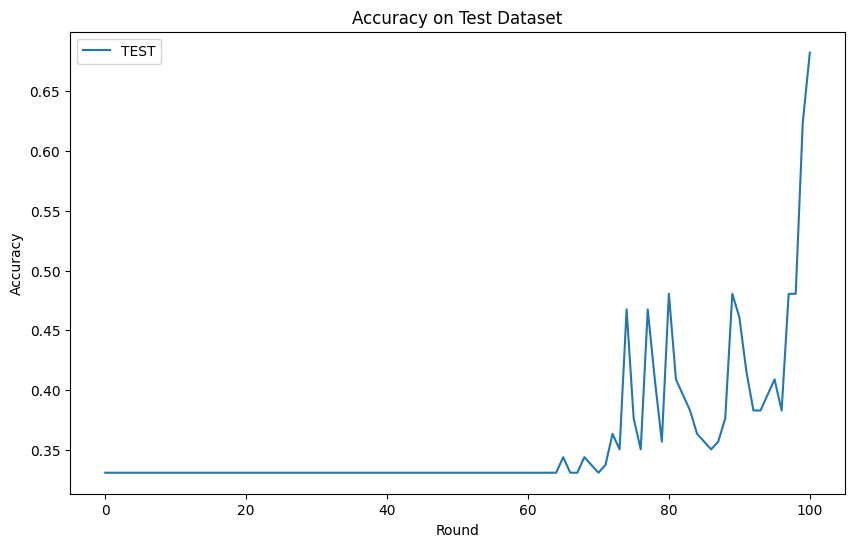

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy metric from the history object
accuracy_test = [x[1] for x in history.metrics_centralized['accuracy TEST']]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the accuracy values
plt.plot(accuracy_test,label="TEST")

# Set the title and axis labels
plt.title("Accuracy on Test Dataset")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()
# Display the plot
plt.show()


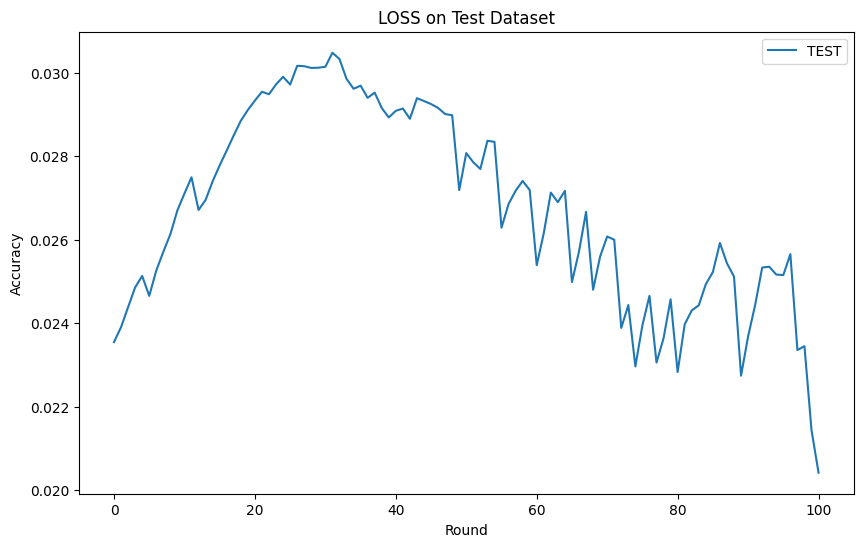

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy metric from the history object
loss_test = [x[1] for x in history.metrics_centralized['loss TEST']]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the loss values
plt.plot(loss_test,label="TEST")

# Set the title and axis labels
plt.title("LOSS on Test Dataset")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()
# Display the plot
plt.show()


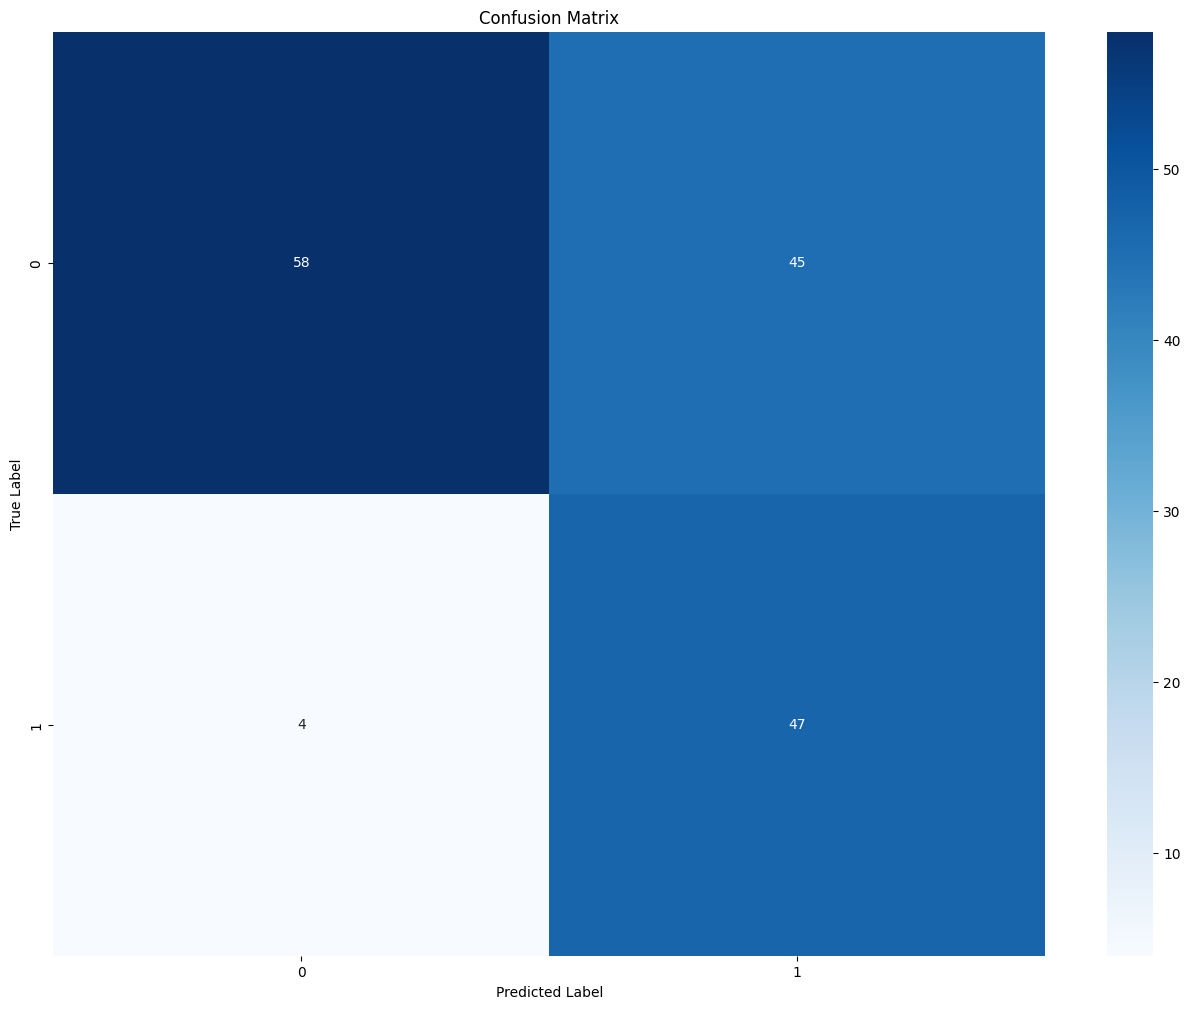

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Get the model's predictions on the public dataset

predictions = get_logits(model, testloader).cpu()

# Convert the predictions to class labels
predictions = torch.argmax(predictions, dim=1)

# Get the true labels for the public dataset
true_labels = torch.cat([batch["labels"] for batch in testloader])

# Create the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

accuracies = []
for trainloader in trainloaders:
  correct = 0
  total = 0
  with torch.no_grad():
    for batch in trainloader:
      inputs, labels = batch["features"].to(DEVICE), batch["labels"].to(DEVICE)
      outputs = model(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  accuracy = 100 * correct / total
  accuracies.append(accuracy)

# Print the accuracy for each trainloader
for i, accuracy in enumerate(accuracies):
  print(f"Accuracy for trainloader {i+1}: {accuracy:.2f}%")


Accuracy for trainloader 1: 83.19%
Accuracy for trainloader 2: 55.07%
Accuracy for trainloader 3: 50.00%
Accuracy for trainloader 4: 76.14%
Accuracy for trainloader 5: 100.00%
Accuracy for trainloader 6: 87.50%
Accuracy for trainloader 7: 53.57%
Accuracy for trainloader 8: 68.18%
Accuracy for trainloader 9: 63.89%
Accuracy for trainloader 10: 76.25%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


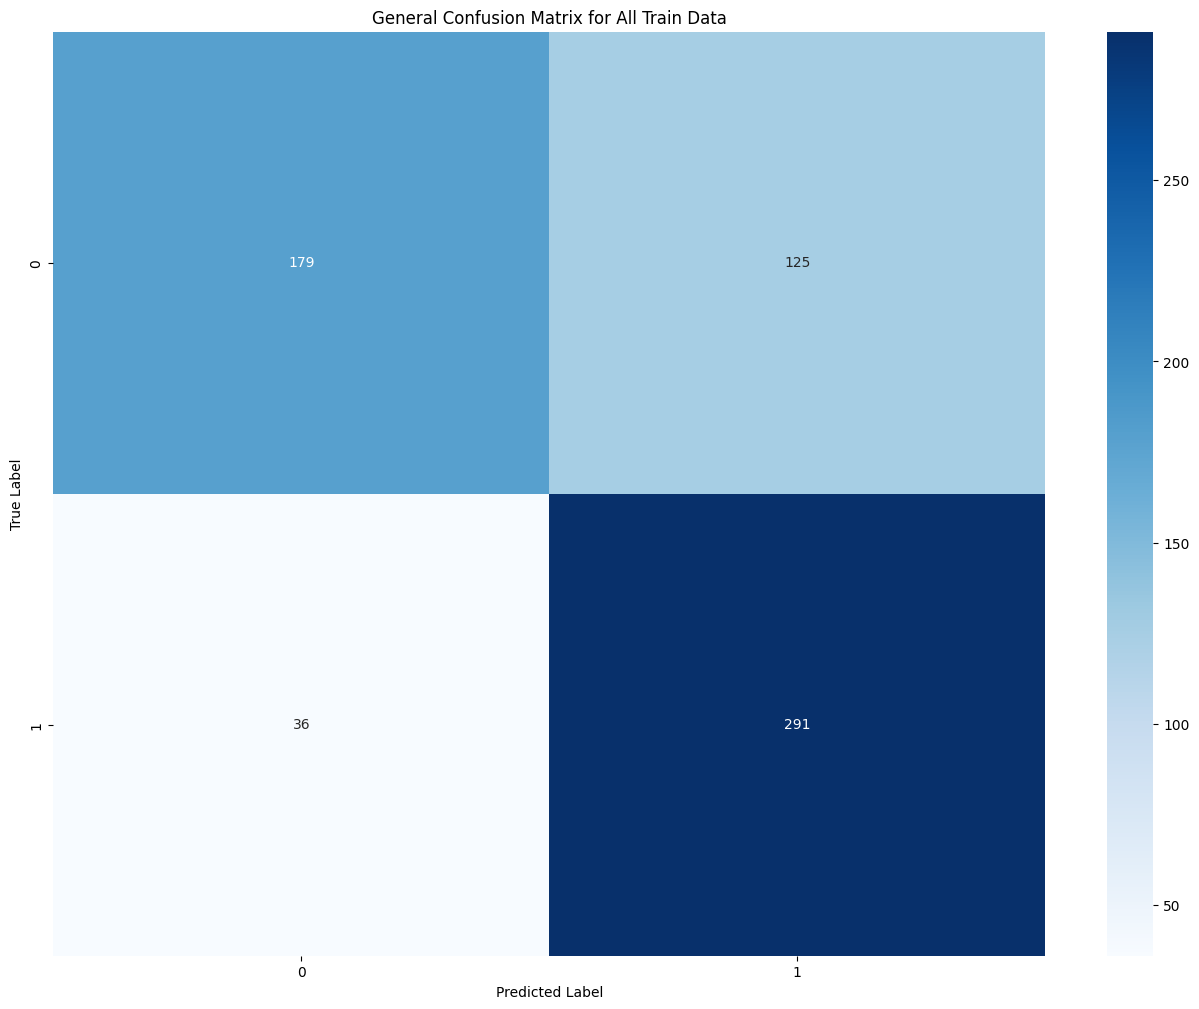

In [ ]:


# Initialize variables
all_predictions = []
all_true_labels = []

# Loop through each trainloader
for trainloader in trainloaders:
  # Get the model's predictions on the trainloader
  predictions = get_logits(model, trainloader).cpu()

  # Convert the predictions to class labels
  predictions = torch.argmax(predictions, dim=1)

  # Get the true labels for the trainloader
  true_labels = torch.cat([batch["labels"] for batch in trainloader])

  # Add the predictions and true labels to the lists
  all_predictions.extend(predictions.tolist())
  all_true_labels.extend(true_labels.tolist())

# Create the confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(NUM_CLASSES), yticklabels=range(NUM_CLASSES))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('General Confusion Matrix for All Train Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.80078125


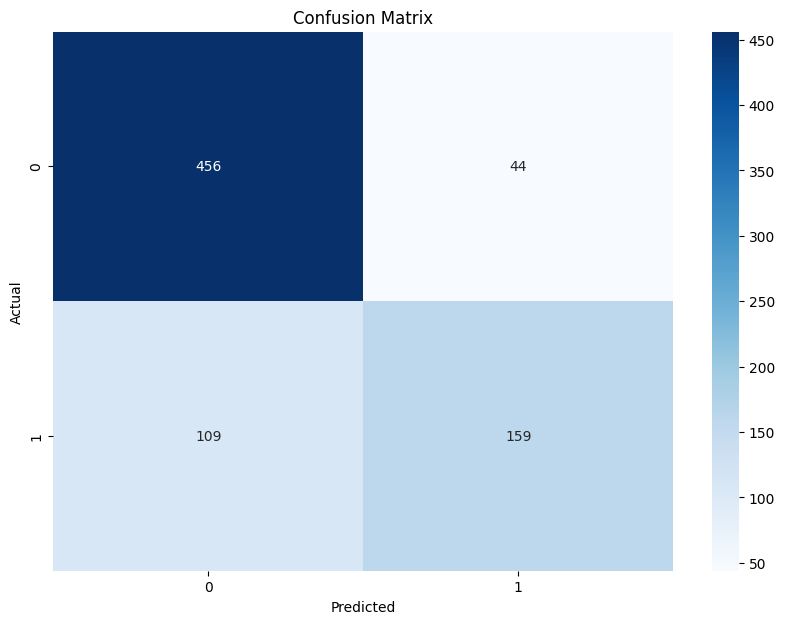

In [ ]:
# prompt: use svm to predict the outcome  class from df using rbf

from sklearn import svm

clf = svm.SVC(kernel='rbf')

# Fit the model to the data
clf.fit(df.iloc[:,:-1], df.iloc[:,-1])

# Make predictions on new data (replace 'new_data' with your actual data)
predictions = clf.predict(df.iloc[:,:-1])
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df.iloc[:,-1], predictions)
print("Accuracy:", accuracy)


# Generate confusion matrix
cm = confusion_matrix(df.iloc[:,-1], predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
